In [1]:
#importing functions
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import preprocessing
import requests
import time
import matplotlib.dates as mdates


In [2]:
# read data file 1
btc_data= pd.read_csv("Bitcoin_data (1).csv")
btc_data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-06,7403.220215,7776.419922,5519.009766,5950.069824,5950.069824,32340969984
1,2017-11-13,5938.250000,8101.910156,5844.290039,8036.490234,8036.490234,30253229824
2,2017-11-20,8039.069824,9522.929688,7762.709961,9330.549805,9330.549805,30501020160
3,2017-11-27,9352.719727,11858.700195,9202.049805,11323.200195,11323.200195,50411559424
4,2017-12-04,11315.400391,18353.400391,11081.799805,15455.400391,15455.400391,92115268608
...,...,...,...,...,...,...,...
218,2022-01-10,41910.230469,44278.421875,39796.570313,43113.878906,43113.878906,199473804544
219,2022-01-17,43118.121094,43413.023438,34349.250000,36276.804688,36276.804688,196326044073
220,2022-01-24,36275.734375,38825.410156,33184.058594,37917.601563,37917.601563,178727434896
221,2022-01-31,37920.281250,41527.785156,36375.539063,41500.875000,41500.875000,108182165770


In [3]:
# read data file 2
eth_data= pd.read_csv("Ethereum_data (1).csv")
eth_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-06,308.644989,329.451996,294.541992,307.907990,307.907990,4235016896
1,2017-11-13,307.024994,371.290985,307.024994,354.385986,354.385986,6084391936
2,2017-11-20,354.093994,485.191986,350.692993,471.329987,471.329987,9316127936
3,2017-11-27,471.531006,522.307007,401.243011,465.852997,465.852997,10504046976
4,2017-12-04,466.053986,504.147003,414.411011,441.721008,441.721008,12094509888
...,...,...,...,...,...,...,...
218,2022-01-10,3157.570557,3401.219971,2947.683594,3350.921875,3350.921875,99393420484
219,2022-01-17,3350.947266,3355.819336,2330.247314,2535.039063,2535.039063,119849284037
220,2022-01-24,2535.891113,2705.784180,2172.301270,2603.466553,2603.466553,117096524892
221,2022-01-31,2603.263428,2983.586914,2489.072266,2983.586914,2983.586914,72592110860


In [4]:
# merge data
cryptotogether= pd.merge(btc_data, eth_data, on= "Date", how= "inner", suffixes= ("_btc", "_eth"))
cryptotogether.head(10)


,Date,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
0,2017-11-06,7403.220215,7776.419922,5519.009766,5950.069824,5950.069824,32340969984,308.644989,329.451996,294.541992,307.907990,307.907990,4235016896
1,2017-11-13,5938.250000,8101.910156,5844.290039,8036.490234,8036.490234,30253229824,307.024994,371.290985,307.024994,354.385986,354.385986,6084391936
2,2017-11-20,8039.069824,9522.929688,7762.709961,9330.549805,9330.549805,30501020160,354.093994,485.191986,350.692993,471.329987,471.329987,9316127936
3,2017-11-27,9352.719727,11858.700195,9202.049805,11323.200195,11323.200195,50411559424,471.531006,522.307007,401.243011,465.852997,465.852997,10504046976
4,2017-12-04,11315.400391,18353.400391,11081.799805,15455.400391,15455.400391,92115268608,466.053986,504.147003,414.411011,441.721008,441.721008,12094509888
5,2017-12-11,15427.400391,20089.000000,15404.799805,19140.800781,19140.800781,93877198848,440.358002,753.120972,439.104004,719.974976,719.974976,22369179776
6,2017-12-18,19106.400391,19371.000000,11833.000000,13925.799805,13925.799805,117256598528,721.731995,881.943970,543.762024,694.148010,694.148010,24643379968
7,2017-12-25,13995.900391,16930.900391,12350.099609,14156.400391,14156.400391,88557499392,698.869995,789.252991,685.231018,756.732971,756.732971,17573120000
8,2018-01-01,14112.200195,17712.400391,13154.700195,16477.599609,16477.599609,123814400000,755.757019,1153.170044,742.004028,1153.170044,1153.170044,36890379264
9,2018-01-08,16476.199219,16537.900391,13105.900391,13772.000000,13772.000000,106022199296,1158.260010,1432.880005,1016.049988,1366.770020,1366.770020,48677970944


In [5]:
# check for missing data
cryptotogether.isnull().any()

Date             False
Open_btc         False
High_btc         False
Low_btc          False
Close_btc        False
Adj Close_btc    False
Volume_btc       False
Open_eth         False
High_eth         False
Low_eth          False
Close_eth        False
Adj Close_eth    False
Volume_eth       False
dtype: bool

In [6]:
# statistical overview
cryptotogether.describe()


,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
count,223.000000,223.000000,223.000000,223.000000,223.000000,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,2.230000e+02
mean,18713.337079,20216.641609,17149.914827,18867.223024,18867.223024,1.757658e+11,976.789931,1075.174546,873.603642,988.958081,988.958081,8.619478e+10
std,17716.364570,18957.228231,16144.542208,17767.982828,17767.982828,1.324265e+11,1213.219832,1317.993878,1091.453551,1220.347327,1220.347327,7.633000e+10
min,3253.123047,3586.750977,3191.303467,3252.839111,3252.839111,2.418872e+10,85.382111,96.257301,82.829887,85.262100,85.262100,4.235017e+09
25%,7170.268310,7678.385254,6596.083496,7170.863282,7170.863282,5.591655e+10,192.122681,210.216469,180.268242,192.141327,192.141327,2.109434e+10
50%,9645.669922,10191.675781,9088.947266,9664.730469,9664.730469,1.573568e+11,371.400146,411.228302,350.692993,375.142059,375.142059,6.264582e+10
75%,32548.374024,35324.634765,28923.497071,32948.191407,32948.191407,2.532544e+11,1288.239075,1432.590027,1031.323273,1340.878113,1340.878113,1.257747e+11
max,65521.289063,68789.625000,62333.914063,65466.839844,65466.839844,7.666798e+11,4627.090820,4891.704590,4485.093262,4626.358887,4626.358887,4.007492e+11


In [7]:
#Finding outliers in the merged dataset tables of bitcoin and ethereum

columns_df = cryptotogether
Quar_1 = columns_df['Close_btc'].quantile(0.25)
Quar_3 = columns_df['Close_btc'].quantile(0.75)
IQR = Quar_3 - Quar_1
    
temp = columns_df['Close_btc']
len(temp[~((temp < (Quar_1 - 1.5 * IQR)) |(temp > (Quar_3 + 1.5 * IQR)))])

223

In [8]:
#Finding outliers in the merged dataset tables of bitcoin and ethereum

columns_df = cryptotogether
Quar_1 = columns_df['Close_eth'].quantile(0.25)
Quar_3 = columns_df['Close_eth'].quantile(0.75)
IQR = Quar_3 - Quar_1
    
temp = columns_df['Close_eth']
len(temp[~((temp < (Quar_1 - 1.5 * IQR)) |(temp > (Quar_3 + 1.5 * IQR)))])

199

In [9]:
#Correlations 

cryptotogether[['Adj Close_btc', 'Adj Close_eth', 'Volume_btc', 'Volume_eth']].corr()

,Adj Close_btc,Adj Close_eth,Volume_btc,Volume_eth
Adj Close_btc,1.000000,0.922779,0.642565,0.707602
Adj Close_eth,0.922779,1.000000,0.429626,0.571853
Volume_btc,0.642565,0.429626,1.000000,0.919594
Volume_eth,0.707602,0.571853,0.919594,1.000000


In [10]:
# create a new df with Adj close values
adj_close_df = pd.DataFrame({'BTC': cryptotogether['Close_btc'],
'ETH': cryptotogether['Close_eth'],
})
adj_close_df

,BTC,ETH
0,5950.069824,307.907990
1,8036.490234,354.385986
2,9330.549805,471.329987
3,11323.200195,465.852997
4,15455.400391,441.721008
...,...,...
218,43113.878906,3350.921875
219,36276.804688,2535.039063
220,37917.601563,2603.466553
221,41500.875000,2983.586914


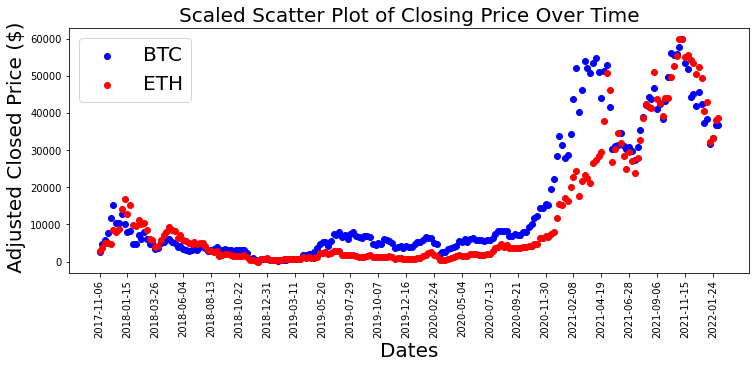

In [11]:
#from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 60000))
scaled = min_max_scaler.fit_transform(adj_close_df)
df_scale = pd.DataFrame(scaled, columns = adj_close_df.columns)

plt.figure(figsize = (12.2, 4.5))
xaxis = cryptotogether["Date"]
yaxis1 = df_scale["BTC"]
yaxis2 = df_scale["ETH"]

plt.scatter(xaxis,yaxis1, c='b', marker='o', label='BTC')
plt.scatter(xaxis, yaxis2, c='r', marker='o', label='ETH')

plt.title('Scaled Scatter Plot of Closing Price Over Time',fontsize=20 )
plt.xlabel('Dates',fontsize=20)
plt.ylabel(' Adjusted Closed Price ($)',fontsize=20)
plt.legend(loc= 'upper left',fontsize=20)
plt.xticks(xaxis,rotation='vertical')
plt.locator_params(axis='x', nbins=len(xaxis)/10)  # set divisor 
plt.savefig("scatter_comparison")
plt.show()



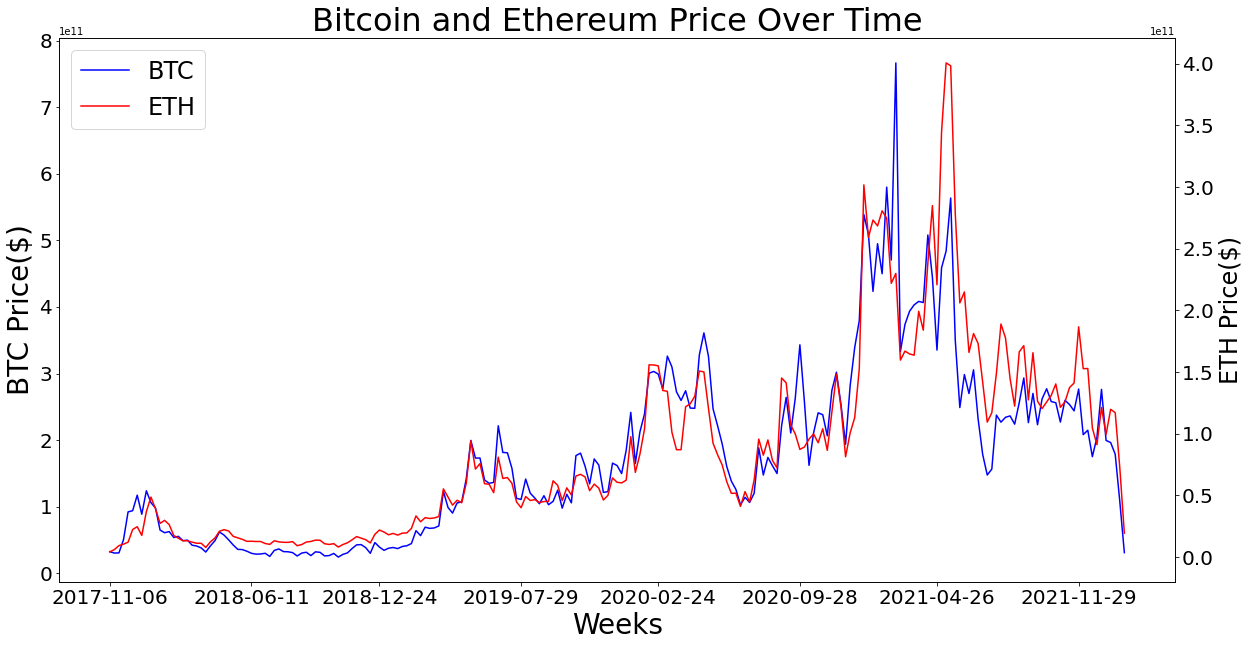

In [12]:
plt.subplots(figsize=(20, 10))

BTC = cryptotogether["Volume_btc"]
ETH = cryptotogether["Volume_eth"]

x_axis = np.arange(len(BTC)) 
plt.xticks(x_axis, cryptotogether["Date"], fontsize = "20")
ax = BTC.plot(x_compat=True, style='b-')
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xlabel('Weeks', fontsize = 28)
plt.ylabel('BTC Price($)', fontsize = 28)

ax = ETH.plot(style='r-', secondary_y=True, fontsize = 20)
plt.ylabel('ETH Price($)', fontsize = 24)
plt.title('Bitcoin and Ethereum Price Over Time', fontsize = 32)

line1, = ax.plot([1], label='BTC', color = 'b')
line2, = ax.plot([1], label='ETH', color = 'r')
ax.legend(handles=[line1, line2], loc = "upper left", fontsize = 24)

plt.savefig("crypto_price")
plt.show()


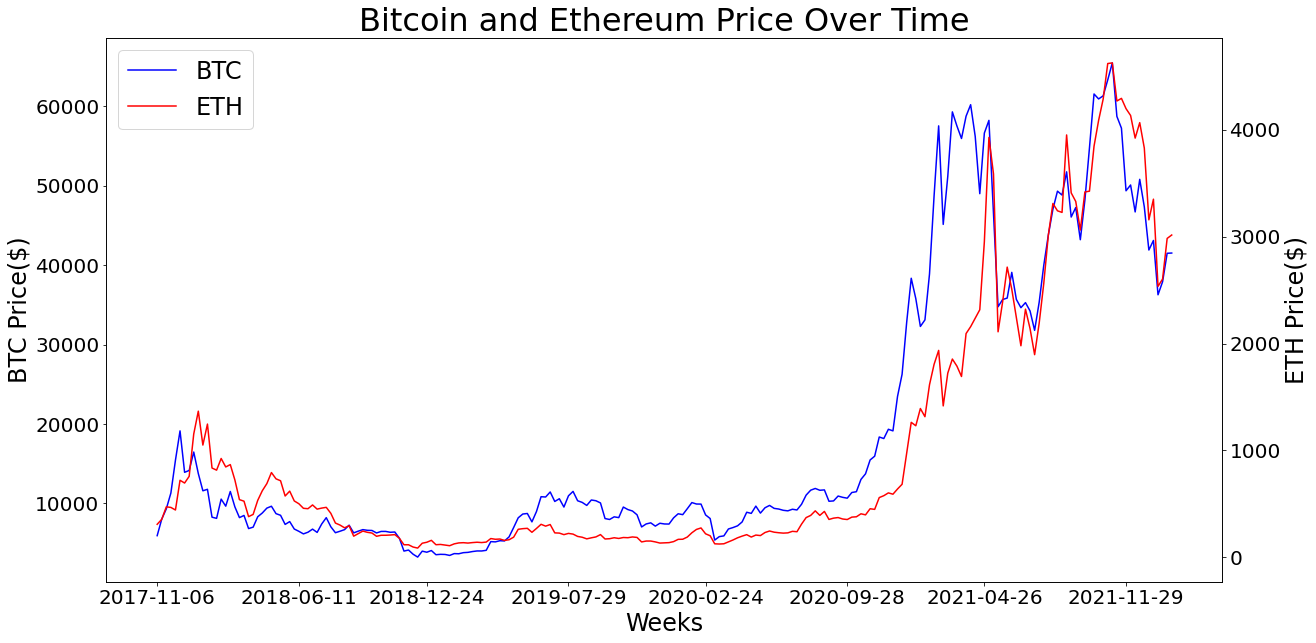

In [13]:
plt.subplots(figsize=(20, 10))

BTC = cryptotogether["Close_btc"]
ETH = cryptotogether["Close_eth"]

x_axis = np.arange(len(BTC)) 
plt.xticks(x_axis, cryptotogether["Date"], fontsize = "24")
ax = BTC.plot(x_compat=True, style='b-')
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.xlabel('Weeks', fontsize = 24)
plt.ylabel('BTC Price($)', fontsize = 24)

ax = ETH.plot(style='r-', secondary_y=True, fontsize = 20)
plt.ylabel('ETH Price($)', fontsize = 24)
plt.title('Bitcoin and Ethereum Price Over Time', fontsize = 32)

line1, = ax.plot([1], label='BTC', color = 'b')
line2, = ax.plot([1], label='ETH', color = 'r')
ax.legend(handles=[line1, line2], loc = "upper left", fontsize = 24)

plt.savefig("crypto_price")
plt.show()

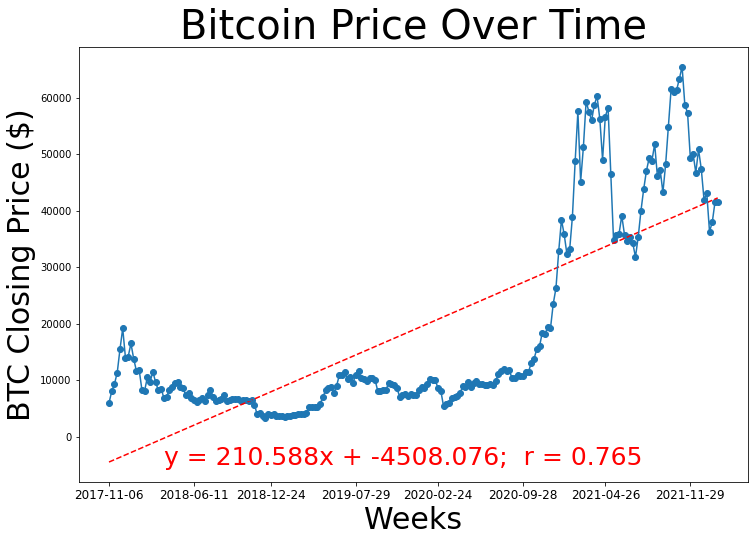

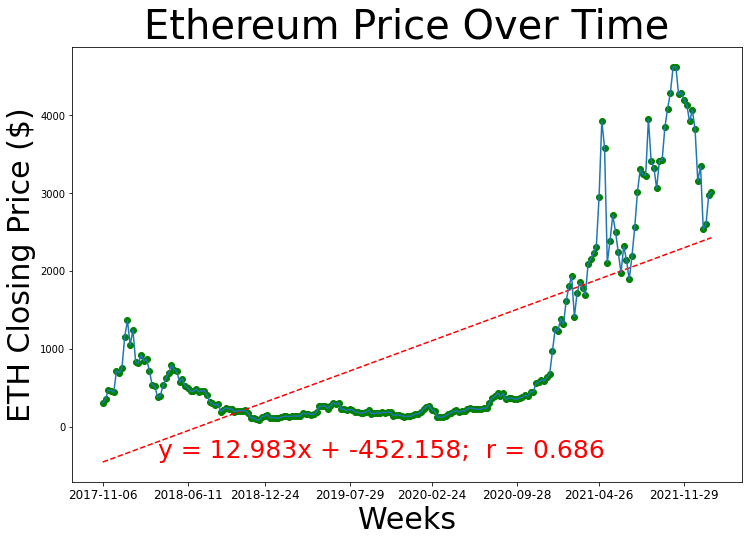

In [14]:
scatter_btc = cryptotogether["Close_btc"]
x_axis = np.arange(len(scatter_btc)) 

(btc_slope, btc_int, btc_r, btc_p, btc_std_err) = linregress(x_axis, scatter_btc)
fit_btc = btc_slope*x_axis + btc_int

plt.figure(figsize=(12,8))
plt.scatter(x_axis, scatter_btc)
plt.plot(x_axis, fit_btc, "--", color = "r")

plt.xticks(x_axis, cryptotogether["Date"], fontsize = "12")
ax = scatter_btc.plot(x_compat=False)
ax.xaxis.set_major_locator(mdates.MonthLocator())

btc_slope = btc_slope.round(3)
btc_int = btc_int.round(3)
btc_r = btc_r.round(3)

plt.xlabel("Weeks",fontsize=30)
plt.ylabel("BTC Closing Price ($)",fontsize=30)
plt.title("Bitcoin Price Over Time",fontsize=40)

plt.text(20,-5000,f"y = {btc_slope}x + {btc_int};  r = {btc_r}", c = "r",fontsize=25)
plt.savefig("regression_crypto_btc")
plt.show()

scatter_eth = cryptotogether["Close_eth"]
(eth_slope, eth_int, eth_r, eth_p, eth_std_err) = linregress(x_axis, scatter_eth)

fit_eth = eth_slope*x_axis + eth_int
plt.figure(figsize=(12,8))
plt.scatter(x_axis,scatter_eth,color= "g" )
plt.plot(x_axis, fit_eth, "--", color = "r")

plt.xticks(x_axis, cryptotogether["Date"],fontsize = "12")
ax2 = scatter_eth.plot(x_compat=True)
ax2.xaxis.set_major_locator(mdates.MonthLocator()) #code to substitute axis values to weeks

eth_slope = eth_slope.round(3)
eth_int = eth_int.round(3)
eth_r = eth_r.round(3)

plt.xlabel("Weeks",fontsize=30)
plt.ylabel("ETH Closing Price ($)",fontsize=30)
plt.title("Ethereum Price Over Time",fontsize=40)

plt.text(20,-400,f"y = {eth_slope}x + {eth_int};  r = {eth_r}", c = "r",fontsize=25)
plt.savefig("regression_crypto_eth")

plt.show()

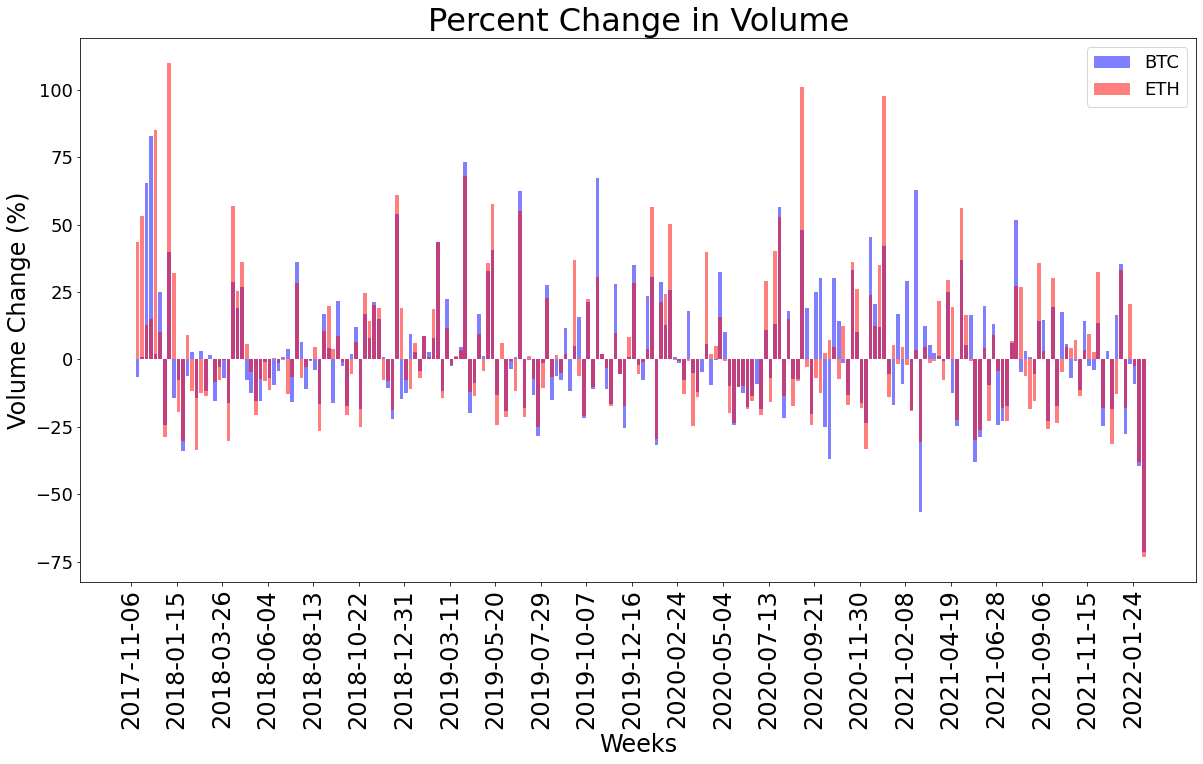

In [15]:
# percentage return on investment (bar chart)
vol_btc_cal = cryptotogether["Volume_btc"].to_list()
vol_eth_cal = cryptotogether["Volume_eth"].to_list()
d_btc_vol =[]
d_eth_vol = []

#calculation of percent volume change
for x in range(len(vol_btc_cal)):
    db = ((vol_btc_cal[x] - vol_btc_cal[x-1])*100/vol_btc_cal[x-1])
    de = ((vol_eth_cal[x] - vol_eth_cal[x-1])*100/vol_eth_cal[x-1])
    d_btc_vol.append(db)
    d_eth_vol.append(de)
#setting the initial value to zero since there is no valid value to compare to.
d_btc_vol[0] = 0
d_eth_vol[0] = 0

plt.rcParams.update({'font.size': 18})
x_axis = cryptotogether["Date"]

plt.figure(figsize=(20,10))

plt.bar(x_axis, d_btc_vol, color='b', alpha=0.5, align="edge")
plt.bar(x_axis, d_eth_vol, color='r', alpha=0.5, align="edge")


plt.xticks(xaxis,rotation='vertical', fontsize = 24)
plt.locator_params(axis='x', nbins=len(x_axis)/10) 

plt.title('Percent Change in Volume',fontsize=32)
plt.ylabel('Volume Change (%)',fontsize=24)
plt.xlabel('Weeks',fontsize=24)

plt.legend(["BTC", "ETH"])
plt.savefig("vol_chg.png")
plt.show()



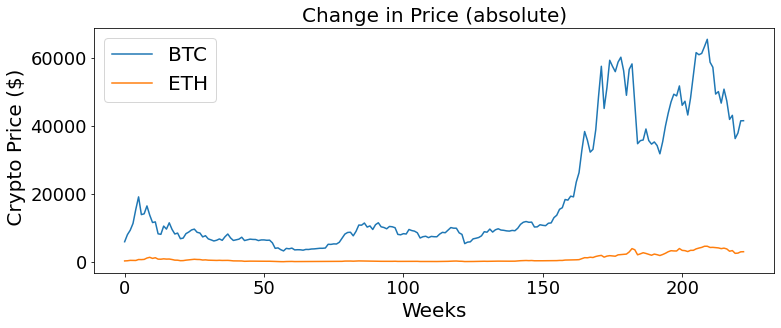

In [16]:
# Weekly price changes (absolute)
plt.figure(figsize = (12.2, 4.5))
for col in adj_close_df.columns.values:
   plt.plot(adj_close_df[col], label = col)
plt.title('Change in Price (absolute)',fontsize=20)
plt.xlabel('Weeks',fontsize=20)
plt.ylabel(' Crypto Price ($)',fontsize=20)
plt.legend(loc= 'upper left',fontsize=20)
plt.savefig("change_price_abs")
plt.show()

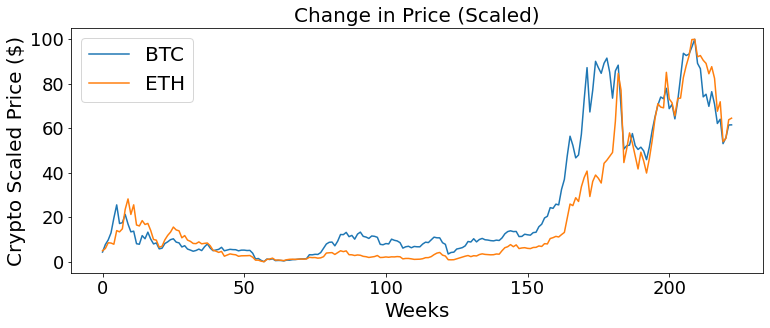

In [17]:
# Weekly price changes (scaled)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(adj_close_df)
df_scale = pd.DataFrame(scaled, columns = adj_close_df.columns)
plt.figure(figsize=(12.4, 4.5))
for col in df_scale.columns.values:
   plt.plot(df_scale[col], label=col)
plt.title('Change in Price (Scaled)',fontsize=20)
plt.xlabel('Weeks',fontsize=20)
plt.ylabel('Crypto Scaled Price ($)',fontsize=20)
plt.legend(loc = 'upper left',fontsize=20)
plt.savefig("change_price_scaled")
plt.show()

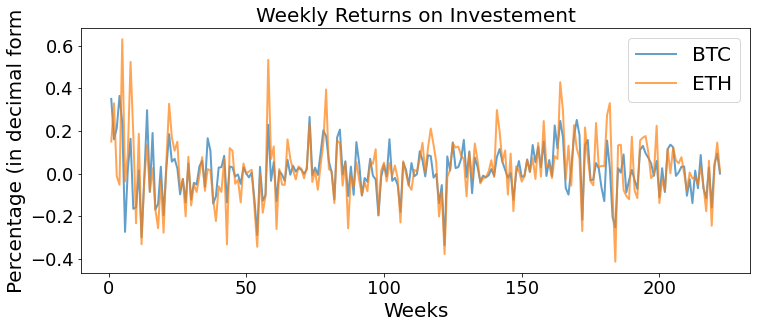

In [18]:
# Weekly return on investment (WRI) (%)
WRI = adj_close_df.pct_change(1)
plt.figure(figsize=(12, 4.5))
for col in WRI.columns.values:
   plt.plot(WRI.index, WRI[col], label = col, lw = 2, alpha = .7)
plt.title('Weekly Returns on Investement',fontsize=20)
plt.ylabel('Percentage (in decimal form',fontsize=20)
plt.xlabel('Weeks',fontsize=20)
plt.legend(WRI.columns.values, loc= 'upper right',fontsize=20)
plt.savefig("weekly_roi")
plt.show()


In [19]:
# volatility
print('The cryptocurrency volatility:')
print(WRI.std())
print('Average daily simple return:')
print(WRI.mean())
WRI.corr()

The cryptocurrency volatility:
BTC    0.112076
ETH    0.148485
dtype: float64
Average daily simple return:
BTC    0.015088
ETH    0.021131
dtype: float64


,BTC,ETH
BTC,1.000000,0.740024
ETH,0.740024,1.000000


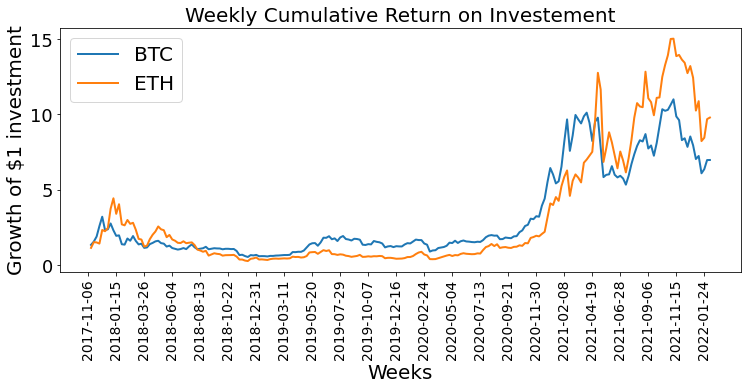

In [20]:
# numpy.cumprod Return the cumulative product of elements along a given axis
# Weekly cumulative resturs on investment (WCRI)
WCRI = (WRI+1).cumprod()
x_axis = cryptotogether["Date"]
plt.figure(figsize=(12.2, 4.5))
for c in WCRI.columns.values:
    plt.plot(x_axis, WCRI[c], lw=2, label= c)
plt.title('Weekly Cumulative Return on Investement',fontsize=20)
plt.xlabel('Weeks',fontsize=20)
plt.ylabel('Growth of $1 investment',fontsize=20)

plt.xticks(xaxis,rotation='vertical', fontsize = 14)
plt.locator_params(axis='x', nbins=len(x_axis)/10) 

plt.legend(WCRI.columns.values, loc = 'upper left' ,fontsize=20)
plt.savefig("crypto_ROI")
plt.show()


In [21]:
# create a new df with Volume values
volume_df = pd.DataFrame({'BTC_VOL': cryptotogether['Volume_btc'],
'ETH_VOL': cryptotogether['Volume_eth'],
})
volume_df


,BTC_VOL,ETH_VOL
0,32340969984,4235016896
1,30253229824,6084391936
2,30501020160,9316127936
3,50411559424,10504046976
4,92115268608,12094509888
...,...,...
218,199473804544,99393420484
219,196326044073,119849284037
220,178727434896,117096524892
221,108182165770,72592110860


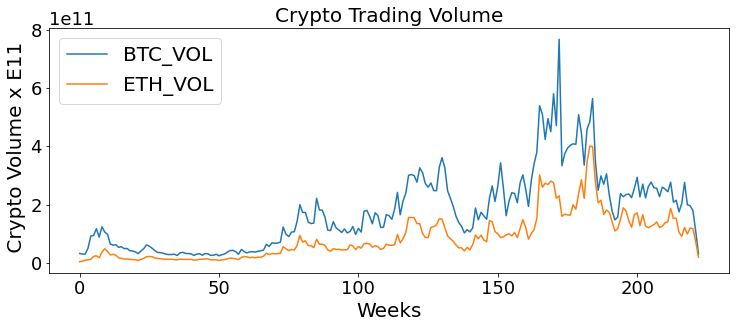

In [22]:
# Weekly volume changes (absolute)
plt.figure(figsize = (12.2, 4.5))
for col in volume_df.columns.values:
    plt.plot(volume_df[col], label = col)
plt.title('Crypto Trading Volume',fontsize=20)
plt.xlabel('Weeks',fontsize=20)
plt.ylabel(' Crypto Volume x E11',fontsize=20)
plt.legend(volume_df.columns.values, loc= 'upper left',fontsize=20)
plt.savefig("volume.png")
plt.show()


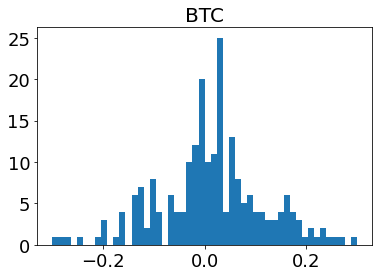

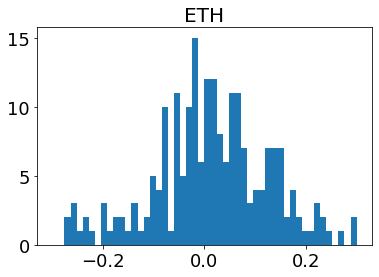

In [23]:
#ploting the histograms of WRI bins
plt.hist(WRI['BTC'], bins=50, range=(-0.30, 0.30))
plt.title('BTC',fontsize=20)
plt.savefig("WRI_btc")
plt.show()
plt.hist(WRI['ETH'], bins=50, range=(-0.30, 0.30))
plt.title('ETH',fontsize=20)
plt.savefig("WRI_eth")
plt.show()

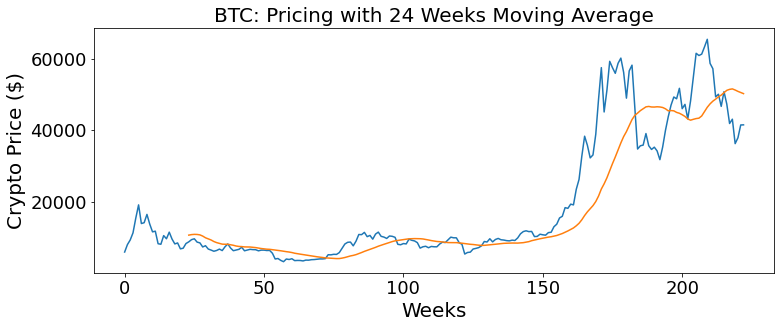

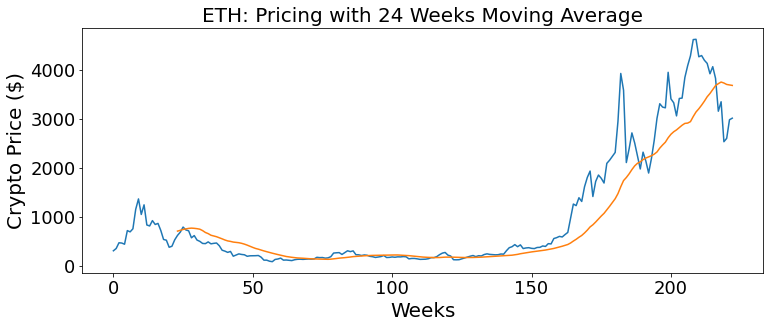

In [24]:
# 6 months (24 weeks) moving average
plt.figure(figsize = (12.2, 4.5))
adj_close=cryptotogether[['Adj Close_btc', 'Adj Close_eth']]
adj_close.head(100)
btc_mov_ave = adj_close ["Adj Close_btc"].rolling(24).mean()
btc_mov_ave
plt.plot(adj_close ["Adj Close_btc"], label= 'Adj Close_btc')
plt.plot(btc_mov_ave, label= 'BTC_Mov_Ave')
plt.title('BTC: Pricing with 24 Weeks Moving Average',fontsize=20)
plt.xlabel('Weeks',fontsize=20)
plt.ylabel('Crypto Price ($)',fontsize=20)
plt.savefig("btc_price_rolling")
plt.show()

plt.figure(figsize = (12.2, 4.5))
btc_mov_ave2 = adj_close ["Adj Close_eth"].rolling(24).mean()
btc_mov_ave2
plt.plot(adj_close ["Adj Close_eth"], label= 'Adj Close_eth')
plt.plot(btc_mov_ave2, label= 'ETH_Mov_Ave')
plt.title('ETH: Pricing with 24 Weeks Moving Average',fontsize=20)
plt.xlabel('Weeks',fontsize=20)
plt.ylabel('Crypto Price ($)',fontsize=20)
plt.savefig("eth_price_rolling")
plt.show()

